In [509]:
import numpy as np
import scipy
from scipy import integrate
from scipy import optimize
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

# Given Offsets

In [510]:
# y = beam
# z = draught
  # Section 1
y1 = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
z1 = np.array([-10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0])
y_1 = y1 * -1
  # Section 2
y2 = np.array([0.0, 0.8, 1.2, 1.2, 1.4, 2.2, 3.5, 5.0, 6.5, 7.4])
z2 = np.array([-10.0, -9.7, -8.4, -6.1, -4.3, -2.1, -1.2, -0.55, -0.15, 0.0])
y_2 = y2 * -1

# Finding area of each section

In [511]:
area1 = scipy.integrate.simps(y1,z1) # simpsons rule
area2 = scipy.integrate.simps(y2,z2)
full_area1 = 2 * area1
full_area2 = 2 * area2
area_1 = 2*np.trapz(y1,z1) # check using trapezium rule
area_2 = 2*np.trapz(y2,z2)

In [512]:
if full_area2==area_2 and full_area1==area_1:
    print('True, area1 =', area1, 'area2 =', area2)
elif full_area2!=area_2 and full_area1==area_1:
    err1 = ((( full_area1 - area_1 ) / full_area1 ) * 100 )
    err2 = ((( full_area2 - area_2 ) / full_area2 ) * 100 )
    print('False, error 1 =',err1, '% and error 2 =', err2, '%')
    if abs(err1)<2 and abs(err2)<2:
        print('But acceptable, area1 =', area1, ' and area2 =', area2)

False, error 1 = 0.0 % and error 2 = -1.0055737937460059 %
But acceptable, area1 = 25.0  and area2 = 18.959349747474743


# Finding section properties

In [513]:
#Section 1
T1 = np.absolute(np.min(z1))
B1 = np.max(2*y1)
BoT1 = B1/T1
Cm1 = (full_area1/(B1*T1))
#Section 2
T2 = np.absolute(np.min(z2))
B2 = np.max(2*y2)
BoT2 = B2/T2
Cm2 = (full_area2/(B2*T2))
print('Section 1:')
print('B=',B1, 'm, T=', T1, 'm, B/T=', BoT1, ', Cm=', Cm1, ', Area=', full_area1)
print('Section 2:')
print('B=',B2, 'm, T=', T2, 'm, B/T=', BoT2, ', Cm=', Cm2, ', Area=', full_area2)

Section 1:
B= 10.0 m, T= 10.0 m, B/T= 1.0 , Cm= 0.5 , Area= 50.0
Section 2:
B= 14.8 m, T= 10.0 m, B/T= 1.48 , Cm= 0.25620742901992893 , Area= 37.918699494949486


# Section 1 Lewis Transform

In [514]:
def BoT_Lewis1(a,b):
    return (2*(1+a+b)/(1-a+b)) # = B/T   # adding a '-' at the start will find other values of a and b

def Cm_Lewis1(a,b):
    A = (np.pi/2) * (1 - (a**2)-3*(b**2))
    return A/(2*(1+a+b)*(1-a+b)) # = Cm

def error1(a,b,Cm,BoT):
    Cm_error1 = Cm-Cm_Lewis1(a,b)
    BoT_error1 = BoT - BoT_Lewis1(a,b)
    return (Cm_error1,BoT_error1)

def f1(x):
    return error1(a=x[0],b=x[1],Cm=Cm1,BoT=BoT1)

x0 = (0,0)

a1,b1 = fsolve(f1,x0)

T0_T1 = (1-a1+b1)/T1                                # Scale factor
Lewis_area = (np.pi/2) * (1 - (a1**2)-3*(b1**2))
Area1 = Lewis_area/T0_T1**2

print('Section 1:') 
print('a=',a1, ', b=', b1)
print('BoT_Lewis=', BoT_Lewis1(a1,b1))
print('Cm_Lewis=', Cm_Lewis1(a1,b1))
print('Lewis Area=', Lewis_area)
print('Area=', Area1)
T0_T1

Section 1:
a= -0.3882670972423619 , b= 0.1648012917276638
BoT_Lewis= 1.0000000000003724
Cm_Lewis= 0.49999999999997247
Lewis Area= 1.206010710409358
Area= 50.000000000015866


0.15530683889700256

# Section 2 Lewis Transform

In [515]:
def BoT_Lewis2(a,b):
    return (2*(1+a+b)/(1-a+b)) # = B/T

def Cm_Lewis2(a,b):
    A = (np.pi/2) * (1 - (a**2)-3*(b**2))
    B = 2*(1+a+b)
    T = (1-a+b)
    return A/(B*T) # = Cm

def error2(a,b,Cm,BoT):
    Cm_error2 = Cm-Cm_Lewis2(a,b)
    BoT_error2 = BoT - BoT_Lewis2(a,b)
    return (Cm_error2,BoT_error2)

def f2(x):
    return error2(a=x[0],b=x[1],Cm=Cm2,BoT=BoT2)

x0 = (0,0)

a2,b2 = fsolve(f2,x0)

T0_T2 = (1-a2+b2)/T2                                # Scale factor
Lewis_area = (np.pi/2) * (1 - (a2**2)-3*(b2**2))
Area2 = Lewis_area/(T0_T2**2)

print('Section 2:') 
print('a=',a2, ', b=', b2)
print('BoT_Lewis=', BoT_Lewis2(a2,b2))
print('Cm_Lewis=', Cm_Lewis2(a2,b2))
print('Lewis Area=', Lewis_area)
print('Area=', Area2)
T0_T2

Section 2:
a= -0.20224428300836483 , b= 0.35348097090214087
BoT_Lewis= 1.4800000000000024
Cm_Lewis= 0.2562074290199472
Lewis Area= 0.9177391042189121
Area= 37.91869949495224


0.15557252539105057

# Plotting the transformation

In [540]:
# Section 1
def zeta(theta):
    return np.exp(1j*theta)+a1*np.exp(-1j*theta)+b1*np.exp(-3j*theta)

theta1 = np.arange(-np.pi/2, 0, 0.01)
z = []

for i in theta1:
    z.append(zeta(i))
    
Y_real1 = [np.real(i) for i in z]
Z_imaginary1 = [np.imag(i) for i in z]

sf1 = abs(T1/np.min(Z_imaginary1))
B1plt = np.array([i*sf1 for i in Y_real1])
T1plt = [i*sf1 for i in Z_imaginary1]

In [541]:
# Section 2
def zeta(theta):
    return np.exp(1j*theta)+a2*np.exp(-1j*theta)+b2*np.exp(-3j*theta)

theta1 = np.arange(-np.pi/2, 0, 0.01)
z = []

for i in theta1:
    z.append(zeta(i))
    
Y_real2 = [np.real(i) for i in z]
Z_imaginary2 = [np.imag(i) for i in z]

sf2 = abs(T2/np.min(Z_imaginary2))
B2plt = np.array([i*sf2 for i in Y_real2])
T2plt = [i*sf2 for i in Z_imaginary2]

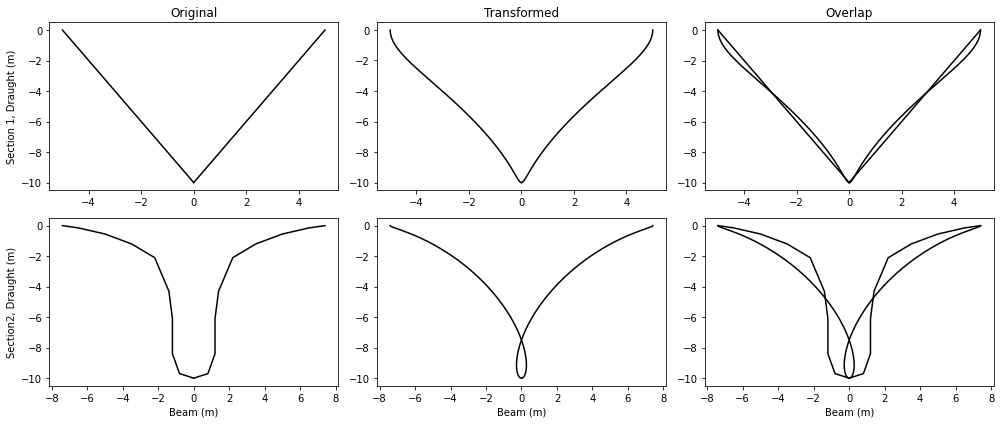

In [543]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))

ax1 = plt.subplot(axes[0, 0])
ax2 = plt.subplot(axes[0, 1])
ax3 = plt.subplot(axes[0, 2])
ax4 = plt.subplot(axes[1, 0])
ax5 = plt.subplot(axes[1, 1])
ax6 = plt.subplot(axes[1, 2])

# Section 1 seperate plots
ax1.plot(y1, z1, color='black')
ax1.plot(y_1, z1, color='black')
ax2.plot(B1plt, T1plt, color='black')
ax2.plot(-B1plt, T1plt, color='black')
# Section 1
ax3.plot(y1, z1, color='black')
ax3.plot(y_1, z1, color='black')
ax3.plot(B1plt, T1plt, color='black')
ax3.plot(-B1plt, T1plt, color='black')
# Section 2 seperate plots
ax4.plot(y2, z2, color='black')
ax4.plot(y_2, z2, color='black')
ax5.plot(B2plt, T2plt, color='black')
ax5.plot(-B2plt, T2plt, color='black')
# Section 2
ax6.plot(y2, z2, color='black')
ax6.plot(y_2, z2, color='black')
ax6.plot(B2plt, T2plt, color='black')
ax6.plot(-B2plt, T2plt, color='black')

ax1.set_ylabel('Section 1, Draught (m)')
ax4.set_ylabel('Section2, Draught (m)')
ax1.title.set_text('Original')
ax2.title.set_text('Transformed')
ax3.title.set_text('Overlap')
ax4.set_xlabel('Beam (m)')
ax5.set_xlabel('Beam (m)')
ax6.set_xlabel('Beam (m)')

fig.tight_layout()

# Quantify the error

In [519]:
imag1 = np.array(Z_imaginary1) / T0_T1
real1 = np.array(Y_real1) / T0_T1
imag2 = np.array(Z_imaginary2) / T0_T2
real2 = np.array(Y_real2) / T0_T2

intp1 = np.interp(z1, imag1, real1)
intp2 = np.interp(z2, imag2, real2)

In [520]:
def intp_error(x_data, x_lewis):
    return ((x_lewis - x_data)/x_data) * 100

In [535]:
intp_error1 = intp_error(y1, intp1)
intp_er1 = abs(intp_error1)
index = [0]
omit_inf1 = np.delete(intp_er1, index)
er1 = np.mean(omit_inf1)
er1

<ipython-input-520-07f4f0e4e3bf>:2: RuntimeWarning: divide by zero encountered in true_divide
  return ((x_lewis - x_data)/x_data) * 100


9.191370383274984

In [534]:
intp_error2 = intp_error(y2, intp2)
intp_er2 = abs(intp_error2)
index = [0]
omit_inf2 = np.delete(intp_er2, index)
er2 = np.mean(omit_inf2)
er2

<ipython-input-520-07f4f0e4e3bf>:2: RuntimeWarning: divide by zero encountered in true_divide
  return ((x_lewis - x_data)/x_data) * 100


51.94315741344339

# Determine the added mass, $ m_{yy} $, and coefficient, $c_{22}$

In [523]:
pi = np.pi
rho = 1025

m_yy1 = pi*rho*0.5 * ((1+a1)**2 + 3*b1**2) * sf1**2
m_yy2 = pi*rho*0.5 * ((1+a2)**2 + 3*b2**2) * sf2**2

c_22_1 = m_yy1/(rho*pi*B1**2/8)
c_22_2 = m_yy2/(rho*pi*B2**2/8)

print('myy1 =',m_yy1, 'kg/m,    c22,1 =', c_22_1)
print('myy2 =',m_yy2, 'kg/m,   c22,2 =', c_22_2)

myy1 = 30418.46969483873 kg/m,    c22,1 = 0.7557072879179867
myy2 = 67273.03405531216 kg/m,   c22,2 = 0.7630163307161962


# Verification using an Ellipse

In [524]:
bb_ell = 2 # a, half beam
T_ell = 1 # b, draught
B_ell = 2 * bb_ell
t = np.linspace(-pi, pi)
y_ell = bb_ell*np.cos(t)
z_ell = T_ell*np.sin(t)

In [525]:
# Check values for half an ellipse
area_ell = 0.5 * np.pi * bb_ell * T_ell
BoT_ell = B_ell / T_ell
Cm_ell = area_ell / (B_ell * T_ell)
myy_el = 0.5* pi*rho*bb_ell**2
print('area ellipse =', area_ell, ', B/T ellipse =', BoT_ell, ', Cm ellipse =', Cm_ell)

area ellipse = 3.141592653589793 , B/T ellipse = 4.0 , Cm ellipse = 0.7853981633974483


In [526]:
def BoT_Lewis_ell(a,b):
    return (2*(1+a+b)/(1-a+b)) # = B/T   # adding a '-' at the start will find other values of a and b

def Cm_Lewis_ell(a,b):
    A = (np.pi/2) * (1 - (a**2)-3*(b**2))
    return A/(2*(1+a+b)*(1-a+b)) # = Cm

def error_ell(a,b,Cm,BoT):
    Cm_error_ell = Cm-Cm_Lewis_ell(a,b)
    BoT_error_ell = BoT - BoT_Lewis_ell(a,b)
    return (Cm_error_ell,BoT_error_ell)

def f_ell(x):
    return error_ell(a=x[0],b=x[1],Cm=Cm_ell,BoT=BoT_ell)

x0 = (0,0)

a_ell,b_ell = fsolve(f_ell,x0)

T0_T_ell = (1-a_ell+b_ell)/T_ell                                # Scale factor
Lewis_area = (np.pi/2) * (1 - (a_ell**2)-3*(b_ell**2))
Area_ell = Lewis_area/T0_T_ell**2

print('Ellipse verification:') 
print('a=',a_ell, ', b=', b_ell)
print('BoT_Lewis=', BoT_Lewis_ell(a_ell,b_ell))
print('Cm_Lewis=', Cm_Lewis_ell(a_ell,b_ell))
print('Lewis Area=', Lewis_area)
print('Area=', Area_ell)

Ellipse verification:
a= 0.33333333333332865 , b= -5.8079343867336e-17
BoT_Lewis= 3.9999999999999583
Cm_Lewis= 0.7853981633974483
Lewis Area= 1.3962634015954685
Area= 3.1415926535897603


In [527]:
def zeta(theta):
    return np.exp(1j*theta)+a_ell*np.exp(-1j*theta)+b_ell*np.exp(-3j*theta)

theta_ell = np.arange(-np.pi, 0, 0.01)
z = []

for i in theta_ell:
    z.append(zeta(i))
    
Y_real_ell = [np.real(i) for i in z]
Z_imaginary_ell = [np.imag(i) for i in z]

sf_ell = abs(T_ell/np.min(Z_imaginary_ell))
B_ell_plt = [i*sf_ell for i in Y_real_ell]
T_ell_plt = [i*sf_ell for i in Z_imaginary_ell]
T_ell_plt_mir = -np.array(T_ell_plt) # mirrors half ellipse

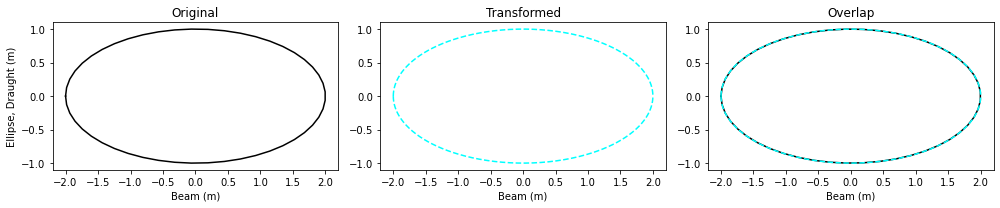

In [528]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))

ax1 = plt.subplot(axes[0])
ax2 = plt.subplot(axes[1])
ax3 = plt.subplot(axes[2])

ax1.plot(y_ell, z_ell, color='black')
ax2.plot(B_ell_plt, T_ell_plt, color='cyan', linestyle='--')
ax2.plot(B_ell_plt, T_ell_plt_mir, color='cyan', linestyle='--')
ax3.plot(y_ell, z_ell, color='black')
ax3.plot(B_ell_plt, T_ell_plt, color='cyan', linestyle='--')
ax3.plot(B_ell_plt, T_ell_plt_mir, color='cyan', linestyle='--')

ax1.set_xlabel('Original')
ax2.set_xlabel('Transformed')
ax3.set_xlabel('Overlap')

ax1.set_ylabel('Ellipse, Draught (m)')
ax1.title.set_text('Original')
ax2.title.set_text('Transformed')
ax3.title.set_text('Overlap')
ax1.set_xlabel('Beam (m)')
ax2.set_xlabel('Beam (m)')
ax3.set_xlabel('Beam (m)')

fig.tight_layout()

In [529]:
myy_ell = pi*rho*0.5 * ((1+a_ell)**2 + 3*b_ell**2) * sf_ell **2 # for half ellipse

c_22_ell = myy_ell/(rho*pi*B_ell**2/8)

print('myy_ell =',myy_ell, 'kg/m,    c_22_ell =', c_22_ell)

myy_ell = 6440.269023866862 kg/m,    c_22_ell = 1.0000006341366114


In [530]:
print('Known values:')
print('area =', area_ell)
print('myy =', myy_el)
print()
print('Lewis values:')
print('area =', Area_ell)
print('myy =', myy_ell)

Known values:
area = 3.141592653589793
myy = 6440.264939859076

Lewis values:
area = 3.1415926535897603
myy = 6440.269023866862


In [531]:
if area_ell==Area_ell and myy_el==myy_ell:
    print('True, area =', Area_ell, ' and myy =', myy_ell)
elif area_ell!=Area_ell and myy_el!=myy_ell:
    err_area = ((( area_ell-Area_ell ) / area_ell ) * 100 )
    err_myy = ((( myy_el - myy_ell ) / myy_el ) * 100 )
    print('False, area error is',err_area, '% and myy error is', err_myy, '%')
    if err_area<2 and err_myy<2:
        print('But acceptable, area =', Area_ell, ' and myy =', myy_ell)

False, area error is 1.04604909523689e-12 % and myy error is -6.341366115322559e-05 %
But acceptable, area = 3.1415926535897603  and myy = 6440.269023866862
